In [11]:
# 실습에필요한패키지불러오기
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
from mlxtend.plotting import plot_decision_regions

# [예제] Iris 데이터를통한실습

In [12]:
# sklearn라이브러리에서datasets를불러온다.
from sklearn import datasets
# iris데이터는load_iris()함수를사용해불러올수있다.
iris = datasets.load_iris()
# 첫번째(sepal length)와세번째(petal length) 변수만추출하여x로할당하고, 타겟변수만추출하여y로할당하자.
x = iris.data[:, [0, 2]]
y = iris.target


In [13]:
# sklearn라이브러리에서제공하는train_test_split함수를불러오자
from sklearn.model_selection import train_test_split
# test_size의비율을30%로, 시드넘버는1로, 층화추출하여데이터를나누자.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)
# sklearn라이브러리에서제공하는StandardScaler라는정규화함수를사용하자.
from sklearn.preprocessing import StandardScaler
# StandardScaler함수의인스턴스인sc라는객체를만들어X_train데이터를넣어보자.
sc= StandardScaler()
sc.fit(x_train)
# 이번에는x_train과x_test데이터를평균0, 표준편차1로정규화시켜보도록하자.
x_train_std= sc.transform(x_train)
x_test_std= sc.transform(x_test)
# x_train_std의평균과표준편차를확인해보자.
print('Mean of x_train_std:',np.mean(x_train_std[:,0]), np.mean(x_train_std[:,1]))
print('Stdof x_train_std:',np.std(x_train_std[:,0]), np.std(x_train_std[:,1]))

Mean of x_train_std: 1.541623971336646e-15 1.1207965772406342e-16
Stdof x_train_std: 1.0 1.0


Misclassified samples: 10
Accuracy: 0.78


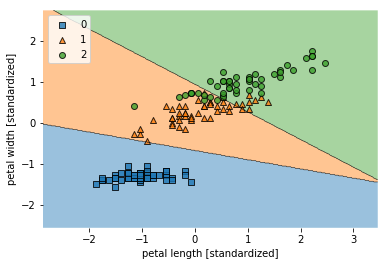

In [14]:
# C가작은경우(오분류를관대하게허용)
# SVC 클래스에kernel='linear', 시드넘버는1, C=0.1로두고모델을피팅시키자.
from sklearn.svm import SVC
svm_smallc= SVC(kernel='linear', random_state=1, C=0.1)
svm_smallc.fit(x_train_std, y_train)
# 데이터를모두펼쳐놓고결정경계그림을그리고자한다.
# train과test로나누었던데이터를다시합쳐보자.
x_combined_std= np.vstack((x_train_std, x_test_std))
y_combined= np.hstack((y_train, y_test))
# 데이터를모두표시하고결정경계를보여주는plot_decision_regions함수를이용하자.
plot_decision_regions(x_combined_std, y_combined, clf=svm_smallc)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
# svm_smallc모델에X_test_std데이터를넣어y값을예측한다.
y_pred= svm_smallc.predict(x_test_std)
# 실제y_pred값을확인하고, y_test값과y_pred값이다른것이있는지확인한다.
y_pred,(y_test!= y_pred)
# y_test와y_pred가다른값이몇개있는지확인한다.
print('Misclassified samples: %d' % (y_test!= y_pred).sum())
# sklearn라이브러리에서정확도를구하는accuracy_score함수를불러온다.
from sklearn.metrics import accuracy_score
# y_test와y_pred을넣고정확도를계산한다.
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 1
Accuracy: 0.98


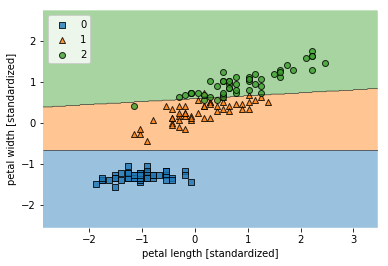

In [14]:
# C가큰경우(오분류를엄격하게허용)
# SVC 클래스에kernel='linear', 시드넘버는1, C=10로두고모델을피팅시키자.
svm_largec= SVC(kernel='linear', random_state=1, C=10)
svm_largec.fit(x_train_std, y_train)
# 데이터를모두표시하고결정경계를보여주는plot_decision_regions함수를이용하자.
plot_decision_regions(x_combined_std, y_combined, clf=svm_largec)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
# svm_largec모델에X_test_std데이터를넣어y값을예측한다.
y_pred= svm_largec.predict(x_test_std)
# 실제y_pred값을확인하고, y_test값과y_pred값이다른것이있는지확인한다.
y_pred,(y_test!= y_pred)
# y_test와y_pred가다른값이몇개있는지확인한다.
print('Misclassified samples: %d' % (y_test!= y_pred).sum())
# sklearn라이브러리에서정확도를구하는accuracy_score함수를불러온다.
from sklearn.metrics import accuracy_score
# y_test와y_pred을넣고정확도를계산한다.
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 4
Accuracy: 0.91


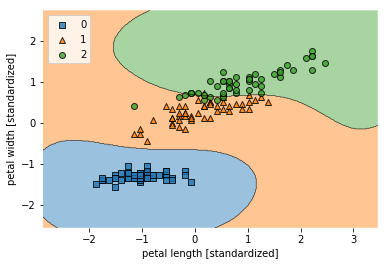

In [15]:
# Kernel SVM : Gamma의값에따른결정경계면의변화
# gamma가작을때: 1
# SVC 클래스에kernel='rbf', 시드넘버는1, gamma=1로두고모델을피팅시키자.
svm_k_smallg= SVC(kernel='rbf', random_state=1, gamma=1)
svm_k_smallg.fit(x_train_std, y_train)
# 데이터를모두표시하고결정경계를보여주는plot_decision_regions함수를이용하자.
plot_decision_regions(x_combined_std, y_combined, clf=svm_k_smallg)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
# svm_k_smallg모델에X_test_std데이터를넣어y값을예측한다.
y_pred= svm_k_smallg.predict(x_test_std)
# 실제y_pred값을확인하고, y_test값과y_pred값이다른것이있는지확인한다.
y_pred,(y_test!= y_pred)
# y_test와y_pred가다른값이몇개있는지확인한다.
print('Misclassified samples: %d' % (y_test!= y_pred).sum())
# sklearn라이브러리에서정확도를구하는accuracy_score함수를불러온다.
from sklearn.metrics import accuracy_score
# y_test와y_pred을넣고정확도를계산한다.
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 2
Accuracy: 0.96


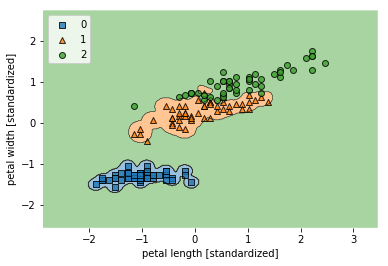

In [16]:
# Kernel SVM : Gamma의값에따른결정경계면의변화
# gamma가클때: 100
# SVC 클래스에kernel='rbf', 시드넘버는1, gamma=100로두고모델을피팅시키자.
svm_k_largeg= SVC(kernel='rbf', random_state=1, gamma=100)
svm_k_largeg.fit(x_train_std, y_train)
# 데이터를모두표시하고결정경계를보여주는plot_decision_regions함수를이용하자.
plot_decision_regions(x_combined_std, y_combined, clf=svm_k_largeg)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
# svm_k_largeg모델에X_test_std데이터를넣어y값을예측한다.
y_pred= svm_k_largeg.predict(x_test_std)
# 실제y_pred값을확인하고, y_test값과y_pred값이다른것이있는지확인한다.
y_pred,(y_test!= y_pred)
# y_test와y_pred가다른값이몇개있는지확인한다.
print('Misclassified samples: %d' % (y_test!= y_pred).sum())
# sklearn라이브러리에서정확도를구하는accuracy_score함수를불러온다.
from sklearn.metrics import accuracy_score
# y_test와y_pred을넣고정확도를계산한다.
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

NameError: name 'plot_decision' is not defined

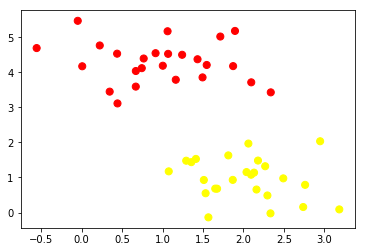

In [9]:
# 실습에필요한패키지불러오기
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
# sklearn라이브러리에서제공하는samples_generator를사용하여2분류의점을생성하자
# 샘플의개수는50개, 집단은2개, 시드넘버는0, 정규분포를따르는집단의표준편차는0.6
from sklearn.datasets.samples_generator import make_blobs
x, y = make_blobs(n_samples=50, centers=2,
random_state=0, cluster_std=0.60)
# sklearn라이브러리의서브디렉토리svm에서SVC라는클래스만불러오도록하자.
from sklearn.svm import SVC
# SVC의옵션을kernel='linear', C=1E10로지정한객체"model"을생성한다.
model = SVC(kernel='linear', C=1E10)
# 위에서생성한x, y 자료를사용하여서포트벡터머신모델에피팅시킨다.(학습이완료됨)
model.fit(x, y)
# 위에서구현했던그래프를다시생성함(x의첫번째열과두번째열을사용, c는점의색깔, s는점의크기, cmap은colormap)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
# util모듈의plot_decision을사용하여피팅한모델의결정경계를그려보자.
plot_decision(model)
# 학습된모델에구해진서포트벡터들을직접살펴보자
model.support_vectors_

NameError: name 'util' is not defined

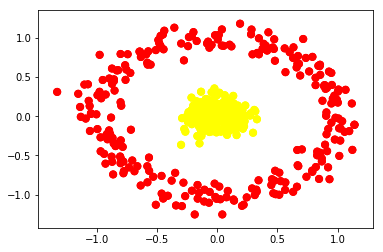

In [15]:

# sklearn라이브러리의samples_generator에서두부류의원모양데이터를제공하는make_circles함수를불러오자.
from sklearn.datasets.samples_generator import make_circles
# 샘플개수500개, factor(바깥쪽원과안쪽원사이의Scale) =.1로지정, noise(데이터의표준편차)=.1로지정하여데이터생성.
x, y = make_circles(500, factor=.1, noise=.1)
# 생성된데이터를그래프에표현.
# (x의첫번째열과두번째열을사용, c는점의색깔, s는점의크기, cmap은colormap)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
# kernel='rbf'로지정하고gamma='auto', C=1E10으로하는model_kernel이라는객체를생성하자.
model_kernel= SVC(kernel='rbf', gamma='auto', C=1E10)
# model_kernel의fit함수를사용하여(x,y)데이터에대한커널SVM모델을생성하자.
model_kernel.fit(x, y)
# 기존의scatter plot을그리자.
# (X의첫번째열과두번째열을사용, c는점의색깔, s는점의크기, cmap은colormap)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
# model_kernel을결정경계를그려주는함수인plot_decision에넣는다.
util.plot_decision(model_kernel)


In [16]:

# 결정경계가모호한데이터셋을생성하여보자.
# 샘플의개수는200개, 집단은2개, 시드넘버는0, 집단의표준편차는0.8
x, y = make_blobs(n_samples=200, centers=2,
random_state=0, cluster_std=0.8)
# 해당데이터셋을scatter plot으로표현해보자.
# (x의첫번째열과두번째열을사용, c는점의색깔, s는점의크기, cmap은colormap)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
# 기울기가m, 절편이b인값을갖는직선을반복문을사용하여그려보자.
for m, b in [(0.7, 1.7), (0.2, 2.15)]:
xfit=np.linspace(-1, 3.5)
yfit= m * xfit+ b
plt.plot(xfit, yfit, 'k')
# SVC의옵션을kernel='linear', C=10, C=0.5로지정한객체"model1"과"model2"를각각생성한다.
model1 = SVC(kernel='linear', C=10)
model2 = SVC(kernel='linear', C=0.5)
# 위에서생성한(x, y) 자료를사용하여각각서포트벡터머신모델에피팅시킨다.(학습이완료됨)
model1.fit(x, y)
model2.fit(x, y)

IndentationError: expected an indented block (<ipython-input-16-74649b5fe7cc>, line 11)

NameError: name 'util' is not defined

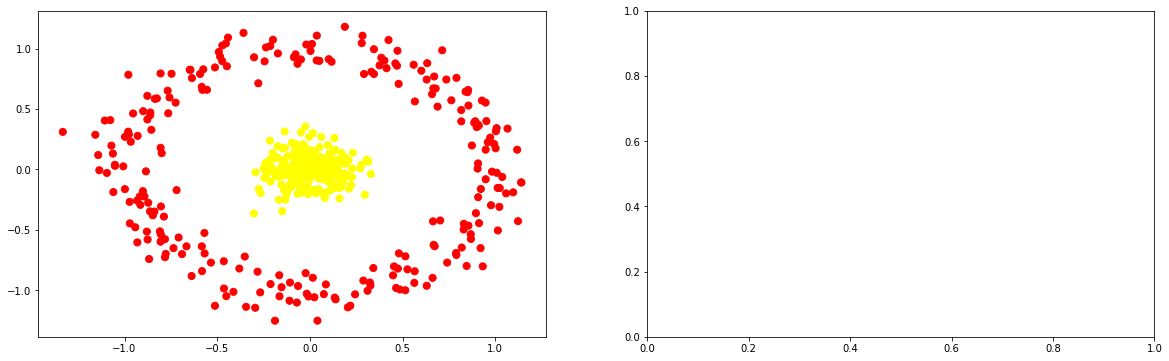

In [17]:

# 한화면에그래프창이두개가뜨도록만들어보자.
# plt의figure라는클래스를사용하여figsize를(20,6)으로갖는fig라는객체를생성해둠.
# fig에서add_subplot이라는함수를사용하여ax1과ax2라는두개의그래프창을생성함.
# ax1은(1,2)의크기를갖고1번자리에표시, ax2는(1,2)의크기를갖고2번자리에표시
fig= plt.figure(figsize=(20,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
# 두개의그래프창에각각C=10일때와, 0.5 때의그림을그려본다.
# X의첫번째변수와두번째변수를사용하는scatter plot을그림, c=color, s=점의크기, cmap=colormap
# C=10일때의model1을사용, ax=ax1사용, 결정경계를그린다.
# 그래프의제목을'C = 10'이라한다.
ax1.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
util.plot_decision(model1,ax=ax1)
ax1.set_title('C = 10')
# X의첫번째변수와두번째변수를사용하는scatter plot을그림, c=color, s=점의크기, cmap=colormap
# C=0.5일때의model1을사용, ax=ax1사용, 결정경계를그린다.
# 그래프의제목을'C = 0.5'라한다.
ax2.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
util.plot_decision(model2,ax=ax2)
ax2.set_title('C = 0.5')
# C값이클수록더엄격하게분할띠를형성하며, C값이작을때는오류를어느정도허용하면서분할띠를형성한다.
